In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df20 = pd.read_csv("churn-bigml-20.csv")
df20.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df20.shape

(667, 20)

In [5]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [6]:
df80 = pd.read_csv("churn-bigml-80.csv")
df80.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df80.shape

(2666, 20)

In [8]:
df = pd.concat([df20, df80], ignore_index=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [9]:
df.shape

(3333, 20)

In [10]:
len(df[df["Churn"] == False])

2850

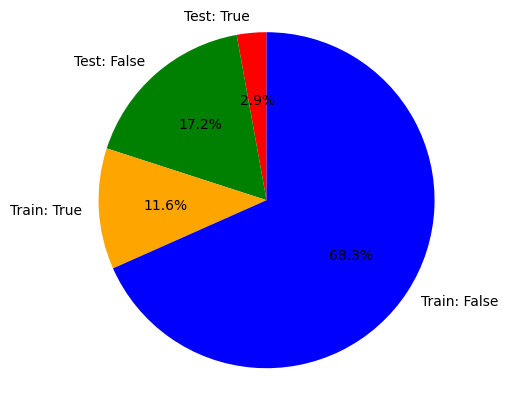

In [11]:
def get_churn_counts(df):
    return [len(df[df['Churn'] == True]), len(df[df['Churn'] == False])]

counts_df20 = get_churn_counts(df20)
counts_df80 = get_churn_counts(df80)

labels = ['Test: True', 'Test: False', 'Train: True', 'Train: False']
colors = ['red', 'green', 'orange', 'blue']

plt.pie(counts_df20 + counts_df80, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

- We observe an imbalance between the 'True' and 'False' classes within our training and testing sets.
- This may potentially lead to biased model performance, as the algorithm may favor the majority class (True), impacting its ability to accurately predict the minority class.

# Build models

In [12]:
df80 = df80.drop(['State'], axis=1)
df20 = df20.drop(['State'], axis=1)

In [13]:
# Separate features (X) and target variable (y) for training set
X_train = df80.drop('Churn', axis=1)
y_train = df80['Churn']

# Separate features (X) and target variable (y) for testing set
X_test = df20.drop('Churn', axis=1)
y_test = df20['Churn']

In [14]:
# Create a preprocessor for numerical and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the ColumnTransformer on the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['International plan', 'Voice mail plan'], dtype='object'))])

In [15]:
# Build a simple neural network using TensorFlow
nn_model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the NN model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early Stoping setting
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the neural network model
nn_history = nn_model.fit(
    preprocessor.transform(X_train),
    y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


134/134 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.8485 - val_loss: 0.4679 - val_accuracy: 0.8258
Epoch 2/200
134/134 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8616 - val_loss: 0.4448 - val_accuracy: 0.8258
Epoch 3/200
134/134 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.8621 - val_loss: 0.4212 - val_accuracy: 0.8258
Epoch 4/200
134/134 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8626 - val_loss: 0.4049 - val_accuracy: 0.8315
Epoch 5/200
134/134 [==============================] - 0s 988us/step - loss: 0.3314 - accuracy: 0.8649 - val_loss: 0.3871 - val_accuracy: 0.8277
Epoch 6/200
134/134 [==============================] - 0s 984us/step - loss: 0.3168 - accuracy: 0.8696 - val_loss: 0.3793 - val_accuracy: 0.8315
Epoch 7/200
134/134 [==============================] - 0s 963us/step - loss: 0.3026 - accuracy: 0.8748 - val_loss: 0.3630 - val_accuracy: 0.8390
Epoch

In [16]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                304       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Because our dataset is not too large and complex, I just build a simple NN model.


Logistic Regression Metrics:
Accuracy: 0.8515742128935532
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.95      0.92       572
        True       0.46      0.27      0.34        95

    accuracy                           0.85       667
   macro avg       0.68      0.61      0.63       667
weighted avg       0.83      0.85      0.83       667

Confusion Matrix:
 [[542  30]
 [ 69  26]]


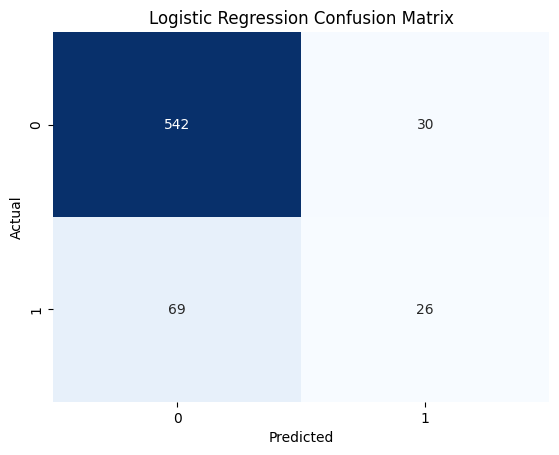


Decision Tree Metrics:
Accuracy: 0.9145427286356822
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       572
        True       0.69      0.72      0.70        95

    accuracy                           0.91       667
   macro avg       0.82      0.83      0.83       667
weighted avg       0.92      0.91      0.92       667

Confusion Matrix:
 [[542  30]
 [ 27  68]]


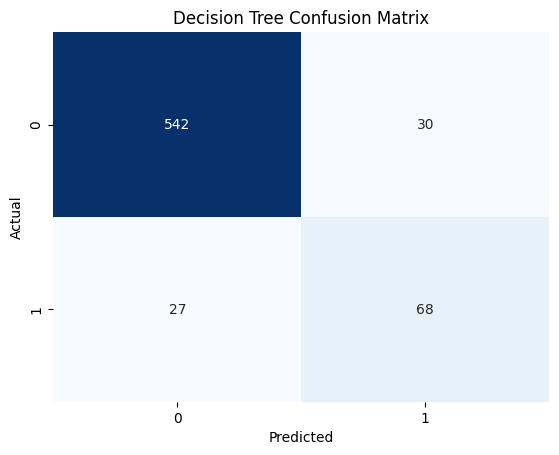


SVM Metrics:
Accuracy: 0.9205397301349325
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95       572
        True       0.76      0.64      0.70        95

    accuracy                           0.92       667
   macro avg       0.85      0.80      0.83       667
weighted avg       0.92      0.92      0.92       667

Confusion Matrix:
 [[553  19]
 [ 34  61]]


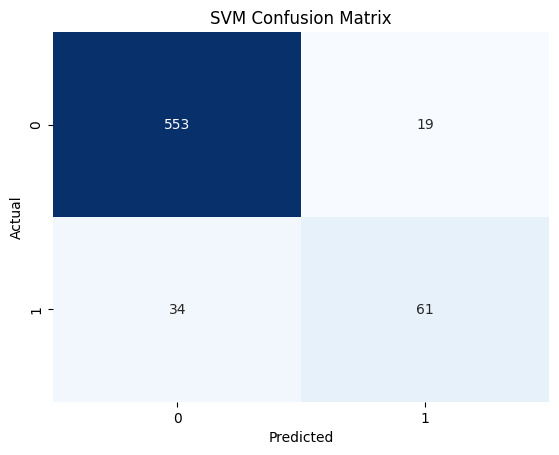


Random Forest Metrics:
Accuracy: 0.9625187406296851
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       572
        True       0.92      0.81      0.86        95

    accuracy                           0.96       667
   macro avg       0.94      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667

Confusion Matrix:
 [[565   7]
 [ 18  77]]


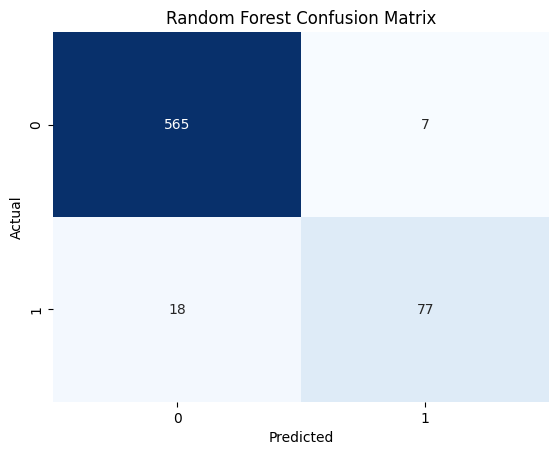

21/21 [==============================] - 0s 660us/step

Neural Network Metrics:
Accuracy: 0.9190404797601199
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.95      0.95       572
        True       0.72      0.72      0.72        95

    accuracy                           0.92       667
   macro avg       0.83      0.83      0.83       667
weighted avg       0.92      0.92      0.92       667

Confusion Matrix:
 [[545  27]
 [ 27  68]]


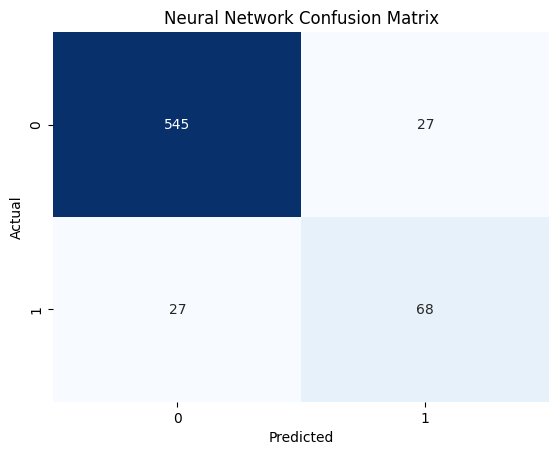

In [45]:
# Create dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Neural Network': nn_model
}

# Evaluate
for name, model in models.items():
    if name == 'Neural Network':
        y_pred_proba = model.predict(preprocessor.transform(X_test))
        y_pred = (y_pred_proba > 0.4).astype(int)  # Here, I prefer optimizing recall, so I change the threshold to 0.4 instead of 0.5.
    else:
        model.fit(preprocessor.transform(X_train), y_train)
        
        y_pred_proba = model.predict_proba(preprocessor.transform(X_test))[:, 1]
        y_pred = (y_pred_proba > 0.4).astype(int)  # Here, I prefer optimizing recall, so I change the threshold to 0.4 instead of 0.5.

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    # Store metrics in dictionaries
    accuracy_scores[name] = accuracy
    precision_scores[name] = precision
    recall_scores[name] = recall

    # Print metrics
    print(f"\n{name} Metrics:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


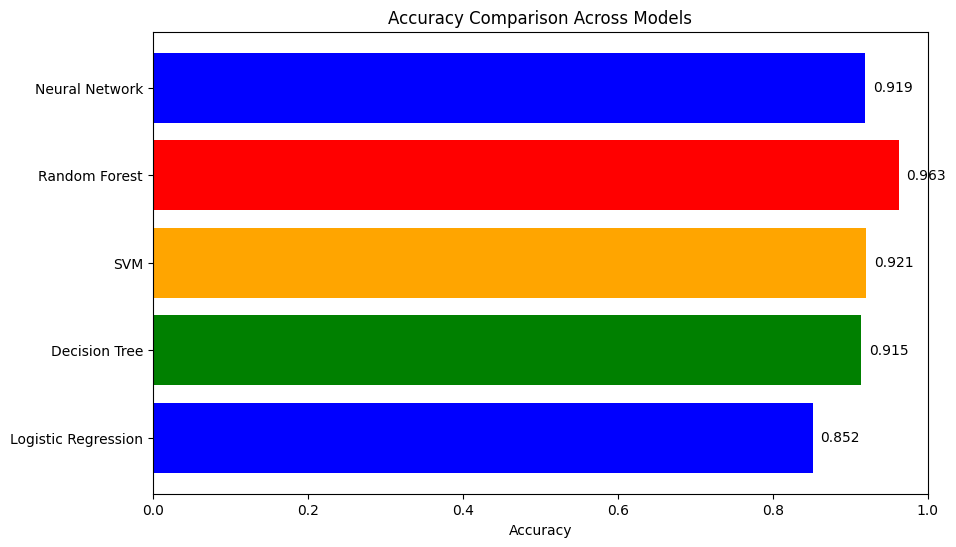

In [46]:
# Plot Accuracy Comparison with Numbers
plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'orange', 'red']
models_list = list(accuracy_scores.keys())
accuracy_values = list(accuracy_scores.values())

bars = plt.barh(models_list, accuracy_values, color=colors)

# Display the accuracy values on the bars
for bar, acc in zip(bars, accuracy_values):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{acc:.3f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Accuracy Comparison Across Models')
plt.xlim(0, 1)
plt.show()


- In essence, Random Forest exhibits the highest accuracy, but relying solely on accuracy is misleading due to dataset imbalance. 

- Evaluating precision and recall is essential for accurate model assessment. Additionally, I observe slight overfitting in my models.


21/21 [==============================] - 0s 627us/step


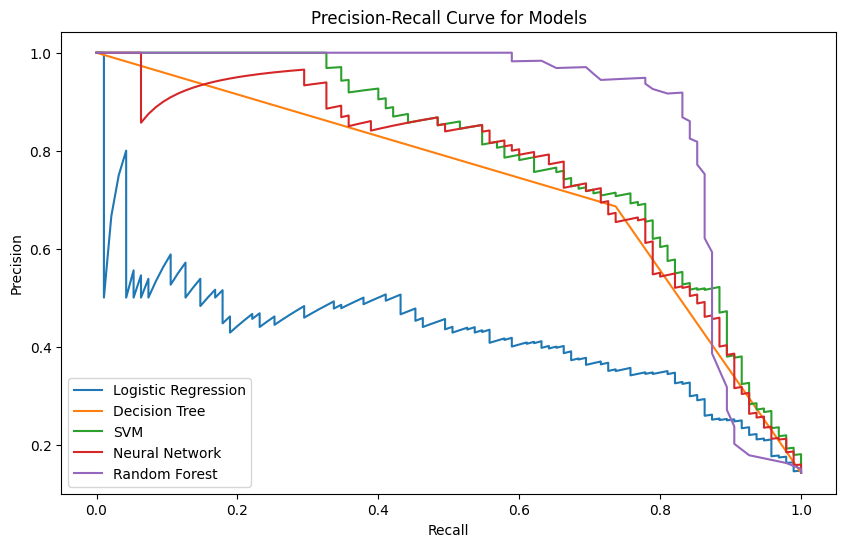

In [44]:
# Create models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': nn_model,
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Plot Precision-Recall Curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if name == 'Neural Network':
        y_pred_proba = model.predict(preprocessor.transform(X_test))
    else:
        model.fit(preprocessor.transform(X_train), y_train)
        y_pred_proba = model.predict_proba(preprocessor.transform(X_test))[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Models')
plt.legend()
plt.show()

Precision:

- A higher precision indicates fewer false positives, meaning that when the model predicts a customer will churn, it is more likely to be correct.

Recall (Sensitivity or True Positive Rate):

- A higher recall indicates fewer false negatives, meaning that the model is better at identifying all customers who actually churned.



My decision:

- In the context of customer churn prediction, businesses often want to identify as many true positives (actual churn cases) as possible, even if it means accepting some false positives. This suggests a higher emphasis on recall.

- Lowering the threshold (0.5 to 0.4) generally increases recall but may decrease precision, and vice versa.

- Random forest is still the best model.


# Clustering

In [ ]:
# Drop 'State' column
df = df.drop(['State'], axis=1)

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Create a preprocessor for numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Fit the preprocessor on the features
X_scaled = preprocessor.fit_transform(X)


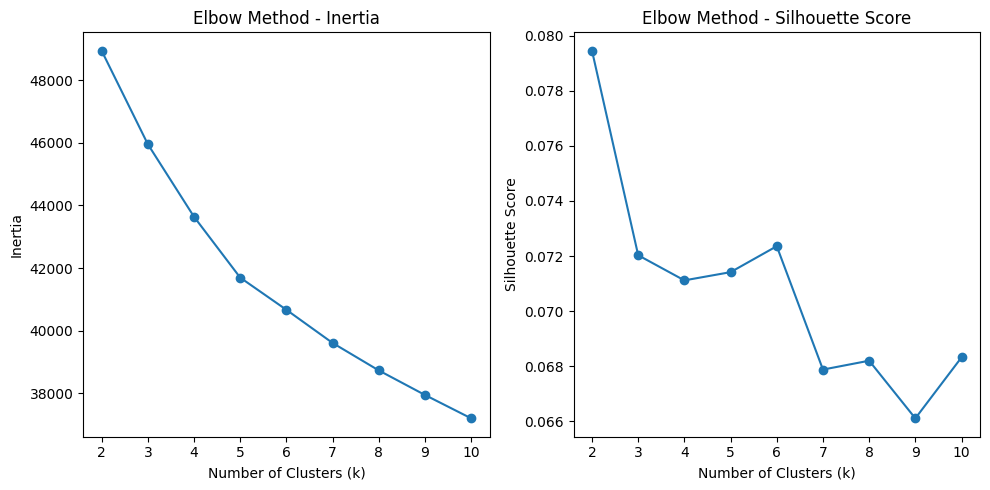

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
possible_k_values = range(2, 11)  # Trying k values from 2 to 10

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Sum of squared distances to the closest centroid (inertia)
    inertia.append(kmeans.inertia_)
    
    # Silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 5))

# Plotting the inertia
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting the silhouette score
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Elbow Method - Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
X_scaled

array([[ 0.40021953, -0.68883427, -0.59175986, ..., -0.19483061,
        -0.55009118, -0.42793202],
       [-0.90578379, -0.52360328, -0.59175986, ...,  0.61789834,
         0.88291665,  1.8529274 ],
       [ 1.50529926, -0.52360328, -0.59175986, ...,  1.83699177,
        -1.73099578,  1.8529274 ],
       ...,
       [-0.83043744, -0.52360328, -0.59175986, ..., -0.19483061,
        -0.231645  ,  1.09264093],
       [-1.83505538,  1.71881732, -0.59175986, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-0.67974475, -0.52360328,  1.23488274, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

In [ ]:
# Choose the optimal number of clusters based on the elbow or silhouette score plot
optimal_k = 3  # Adjust this based on the plots

# Apply K-means clustering with the chosen number of clusters
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = final_kmeans.fit_predict(X_scaled)
#

In [ ]:
clusters

array([0, 1, 0, ..., 2, 1, 0])

In [ ]:
df['Cluster'] = clusters

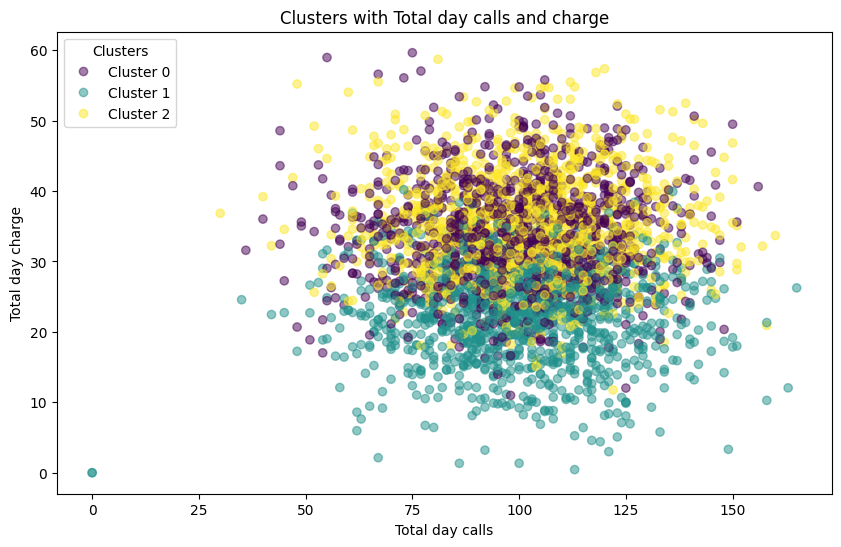

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Total day calls'], df['Total day charge'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters with Total day calls and charge')
plt.xlabel('Total day calls')
plt.ylabel('Total day charge')

legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')

plt.show()

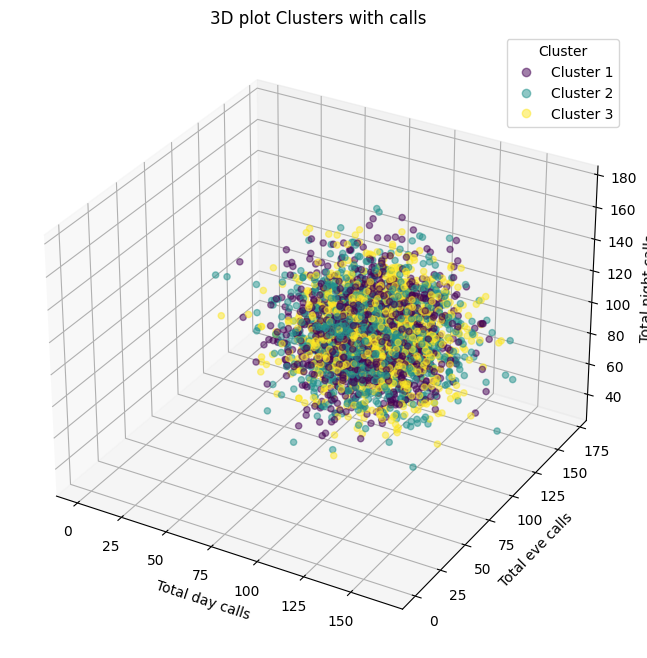

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Total day calls'], df['Total eve calls'], df['Total night calls'], c=df['Cluster'], cmap='viridis', alpha=0.5)

ax.set_xlabel('Total day calls')
ax.set_ylabel('Total eve calls')
ax.set_zlabel('Total night calls')

legend_labels = ['Cluster 1','Cluster 2', 'Cluster 3']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster')

plt.title('3D plot Clusters with calls')
plt.show()

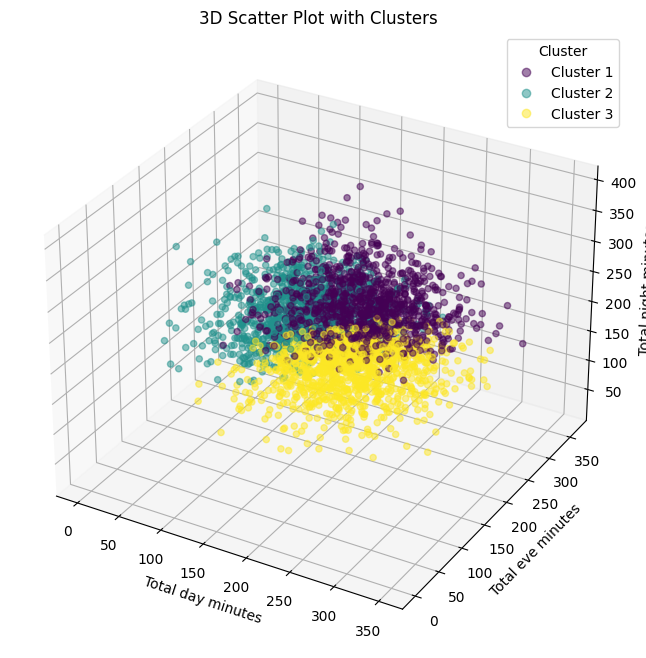

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Total day minutes'], df['Total eve minutes'], df['Total night minutes'], c=df['Cluster'], cmap='viridis', alpha=0.5)

ax.set_xlabel('Total day minutes')
ax.set_ylabel('Total eve minutes')
ax.set_zlabel('Total night minutes')

legend_labels = ['Cluster 1','Cluster 2', 'Cluster 3']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Cluster')

plt.title('3D Scatter Plot with Clusters')
plt.show()

K-means clustering with K = 3 reveals distinct customer types in a 3D graph of day, eve, and night usage, providing insights for tailored services


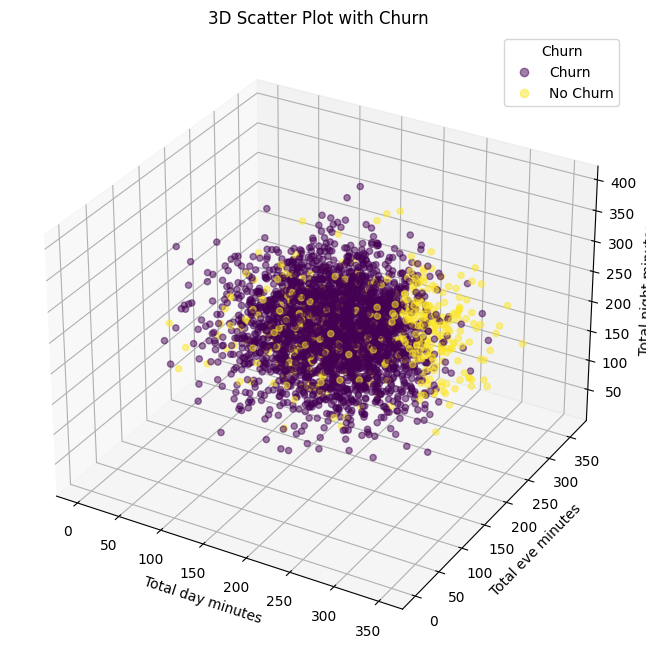

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Total day minutes'], df['Total eve minutes'], df['Total night minutes'], c=df['Churn'], cmap='viridis', alpha=0.5)

ax.set_xlabel('Total day minutes')
ax.set_ylabel('Total eve minutes')
ax.set_zlabel('Total night minutes')

legend_labels = ['Churn','No Churn']
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Churn')

plt.title('3D Scatter Plot with Churn')
plt.show()

In [ ]:
fig = px.scatter_3d(df, x='Total day minutes', y='Total eve minutes', z='Total night minutes',
                    color='Churn', symbol='Churn',
                    title='3D Scatter Plot',
                    labels={'Total day minutes': 'Total Day Minutes',
                            'Total eve minutes': 'Total Eve Minutes',
                            'Total night minutes': 'Total Night Minutes'},
                    color_discrete_map={False: 'blue', True: 'red'})

fig.update_layout(scene=dict(xaxis_title='Total Day Minutes',
                             yaxis_title='Total Eve Minutes',
                             zaxis_title='Total Night Minutes'),
                  legend_title='Churn',
                  showlegend=True)

fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Total day charge', y='Total eve charge', z='Total night charge',
                    color='Cluster', symbol='Cluster',
                    title='3D Scatter Plot',
                    labels={'Total day charge': 'Total Day Charge',
                            'Total eve charge': 'Total Eve Charge',
                            'Total night charge': 'Total Night Charge'},
                    color_discrete_map={False: 'blue', True: 'red'})

fig.update_layout(scene=dict(xaxis_title='Total Day Charge',
                             yaxis_title='Total Eve Charge',
                             zaxis_title='Total Night Charge'),
                  legend_title='Cluster',
                  showlegend=True)

fig.show()

In [ ]:
fig = px.scatter_3d(df, x='Total day minutes', y='Total eve minutes', z='Total night minutes',
                    color='Cluster', symbol='Cluster',
                    title='3D Scatter Plot',
                    labels={'Total day calls': 'Total Day Calls',
                            'Total day charge': 'Total Day Charge',
                            'Total day minutes': 'Total Day Minutes'},
                    color_discrete_map={False: 'blue', True: 'red'})

fig.update_layout(scene=dict(xaxis_title='Total Day Calls',
                             yaxis_title='Total Day Charge',
                             zaxis_title='Total Day Minutes'),
                  legend_title='Churn',
                  showlegend=True)

fig.show()